In [5]:
import matplotlib.pyplot as plt
from detecto.utils import read_image


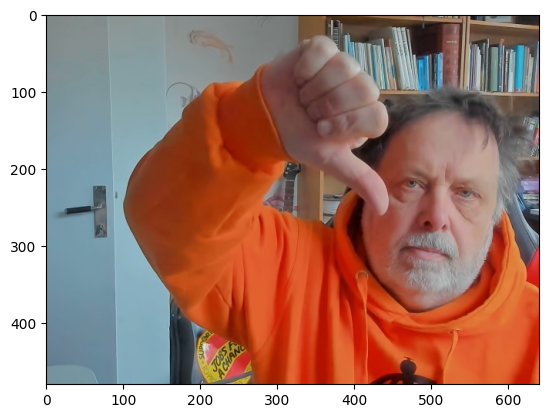

In [6]:
img = read_image('./images/grabbed/thumbs_down/thumbs_down-4c920e5d-e3f9-11ed-8397-04421adec05c.jpg')

plt.imshow(img)
plt.show()

In [19]:
from detecto.core import Dataset

dataset = Dataset('./data')


In [20]:
len(dataset)

24

In [14]:
train_dataset, val_dataset = dataset.split(0.2)

AttributeError: 'Dataset' object has no attribute 'split'

In [13]:
from detecto.visualize import show_labeled_image

image, targets = dataset[15]
show_labeled_image(image, targets['boxes'], targets['labels'])


IndexError: index 0 is out of bounds for axis 0 with size 0

## Create and train the model


In [21]:
from detecto.core import Model

model = Model(['FingersCrossed', 'Hello', 'ThumbsDown', 'ThumbsUp'])


c:\code\iths2\Object_detection\.env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\code\iths2\Object_detection\.env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
model.fit(dataset)

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 24/24 [01:45<00:00,  4.40s/it]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 24/24 [01:44<00:00,  4.37s/it]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 24/24 [01:46<00:00,  4.43s/it]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 24/24 [01:44<00:00,  4.34s/it]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 24/24 [01:44<00:00,  4.34s/it]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 24/24 [01:46<00:00,  4.45s/it]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 24/24 [01:44<00:00,  4.36s/it]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 24/24 [01:44<00:00,  4.34s/it]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 24/24 [01:44<00:00,  4.37s/it]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 24/24 [01:44<00:00,  4.37s/it]


In [23]:
model.save('gesture_model.pth')

In [11]:
loaded_model = Model.load('gesture_model.pth', ['FingersCrossed', 'Hello', 'ThumbsDown', 'ThumbsUp'])


In [44]:
test_image = read_image('./images/grabbed/thumbs_up/thumbs_up-44c28c0d-e3f9-11ed-b403-04421adec05c.jpg')


In [45]:
labels, boxes, scores = model.predict(test_image)


In [46]:
print('Labels: ', labels)
print('Boxes: ', boxes)
print('Scores: ', scores)


Labels:  ['ThumbsUp', 'FingersCrossed', 'ThumbsDown', 'Hello']
Boxes:  tensor([[183.0327, 221.5486, 328.8092, 480.0000],
        [191.5181, 255.6419, 346.9711, 435.7383],
        [187.5156, 251.9971, 358.7592, 478.3208],
        [187.5741, 246.8737, 335.2560, 480.0000]])
Scores:  tensor([0.7946, 0.3674, 0.3255, 0.2641])


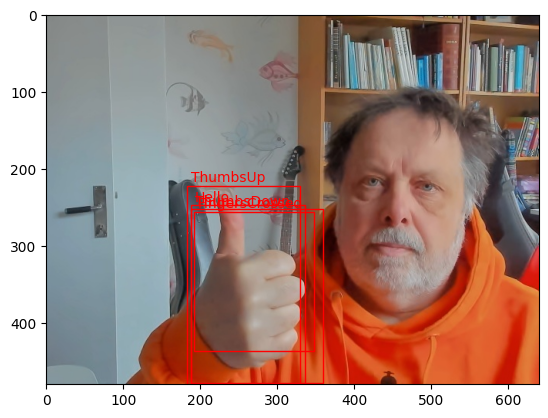

In [47]:
show_labeled_image(test_image, boxes, labels)


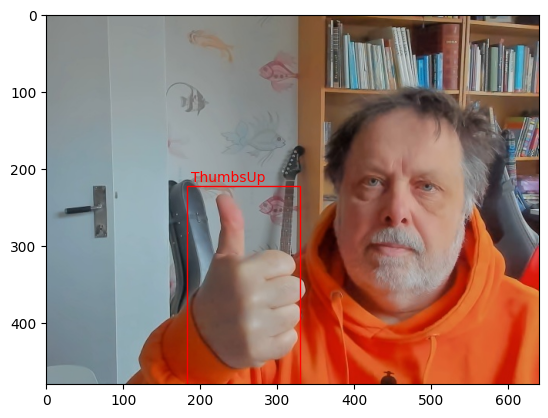

In [48]:
show_labeled_image(test_image, boxes[0], labels[0])
